In [236]:
%matplotlib notebook

import pandas as pd
import numpy as np
train_raw_data = pd.read_json("../Twibot-20/train.json")
#train_raw_data = train_raw_data.drop(['tweet'], axis=1)

train_raw_data.head()
probe_date = pd.to_datetime('2020-09-06', utc=True)
print(probe_date)

2020-09-06 00:00:00+00:00


In [237]:
train_profile = pd.DataFrame([profile for profile in train_raw_data.profile])

train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

train_profile.set_index('id', inplace=True)

#Douteux
train_profile = train_profile.replace([0], 1)


train_labels = train_raw_data["label"].values
train_dict = {"statuses_count":train_profile.statuses_count, 
                "followers_count":train_profile.followers_count, 
                "friends_count":train_profile.friends_count, 
                "favourites_count":train_profile.favourites_count, 
                "listed_count":train_profile.listed_count, 
                "default_profile":train_profile.default_profile,
                "profile_use_background_image":train_profile.profile_use_background_image,
                "verified":train_profile.verified,
                "user_age":(probe_date - pd.to_datetime(train_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(train_profile.statuses_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(train_profile.followers_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(train_profile.friends_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(train_profile.favourites_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(train_profile.listed_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(train_profile.followers_count / train_profile.friends_count),
                "screen_name_length": train_profile.screen_name.str.len(),
                "num_digits_in_screen_name": train_profile.screen_name.str.count('\d'),
                "name_length": train_profile.name.str.len(),
                "num_digits_in_name": train_profile.name.str.count('\d'),
                "description_length": train_profile.description.str.len(),
                 "label":train_labels
               }
train_features = pd.DataFrame(data=train_dict)
train_features = train_features.replace({'True ': True, 'False ': False})
train_features.fillna(0)

train_features.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
count,8.278000e+03,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000
mean,2.158684e+04,6.464586e+05,6.609924e+03,13297.515100,1504.744262,2581.310461,8.276511,184.910579,3.368382,8.136530,0.396479,4.483242e+04,12.139889,0.764557,14.057381,0.104011,83.046146,0.561247
std,9.008917e+04,4.148888e+06,6.377856e+04,40415.669701,9855.033473,1423.596291,27.756118,1076.876131,20.468369,27.560025,2.322571,1.356607e+06,2.710466,1.756609,6.125798,0.596134,55.984721,0.496265
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.000239,0.000254,0.000202,0.000205,0.000217,1.034661e-03,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,4.050000e+02,2.010000e+02,2.310000e+02,146.000000,1.000000,1335.000000,0.289851,0.131924,0.119376,0.095520,0.001410,3.494753e-01,10.000000,0.000000,11.000000,0.000000,30.000000,0.000000
50%,3.624000e+03,1.939500e+03,7.230000e+02,1584.500000,13.000000,2885.000000,1.612506,1.049092,0.348204,0.773529,0.009496,1.063065e+00,12.000000,0.000000,14.000000,0.000000,86.000000,1.000000
75%,1.572975e+04,3.762050e+04,2.124000e+03,9121.250000,258.000000,3875.000000,6.271325,15.579376,1.252045,4.408160,0.100146,3.232864e+01,14.000000,1.000000,17.000000,0.000000,138.000000,1.000000
max,5.140025e+06,1.124032e+08,4.339982e+06,783456.000000,550181.000000,5282.000000,1296.349306,26897.141900,1044.520337,541.424710,131.653745,8.703181e+07,16.000000,13.000000,51.000000,10.000000,202.000000,1.000000


In [238]:
(train_features['label'] == 0).sum()

3632

In [239]:
(train_features['label'] == 1).sum()

4646

In [240]:
train_features['verified']

id
17461978                 True
1297437077403885568     False
17685258                 True
15750898                 True
1659167666              False
                        ...  
1630890068               True
713519580757536769      False
93345260                False
1749309397              False
50471224                False
Name: verified, Length: 8278, dtype: bool

In [241]:
(train_features['verified'] == 0).sum()

6221

In [243]:
import pandas as pd
test_raw_data = pd.read_json("../Twibot-20/test.json")
test_raw_data = test_raw_data.drop(['tweet'], axis=1)

test_raw_data.head()

,ID,profile,neighbor,domain,label
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",None,"[Politics, Sports]",1
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...",None,"[Politics, Business, Entertainment, Sports]",0
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...","{'following': ['36734275', '20713061', '755419...",[Politics],0
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","{'following': ['87818409', '41390292', '140910...",[Politics],1
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",None,"[Politics, Business, Entertainment, Sports]",0


In [244]:
test_profile = pd.DataFrame([profile for profile in test_raw_data.profile])

test_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = test_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

test_profile.set_index('id', inplace=True)

#Douteux
test_profile = test_profile.replace([0], 1)


test_labels = test_raw_data["label"].values
test_dict = {"statuses_count":test_profile.statuses_count, 
                "followers_count":test_profile.followers_count, 
                "friends_count":test_profile.friends_count, 
                "favourites_count":test_profile.favourites_count, 
                "listed_count":test_profile.listed_count, 
                "default_profile":test_profile.default_profile,
                "profile_use_background_image":test_profile.profile_use_background_image,
                "verified":test_profile.verified,
                "user_age":(probe_date - pd.to_datetime(test_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(test_profile.statuses_count / (probe_date - pd.to_datetime(test_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(test_profile.followers_count / (probe_date - pd.to_datetime(test_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(test_profile.friends_count / (probe_date - pd.to_datetime(test_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(test_profile.favourites_count / (probe_date - pd.to_datetime(test_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(test_profile.listed_count / (probe_date - pd.to_datetime(test_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(test_profile.followers_count / test_profile.friends_count),
                "screen_name_length": test_profile.screen_name.str.len(),
                "num_digits_in_screen_name": test_profile.screen_name.str.count('\d'),
                "name_length": test_profile.name.str.len(),
                "num_digits_in_name": test_profile.name.str.count('\d'),
                "description_length": test_profile.description.str.len(),
                 "label":test_labels
               }
test_features = pd.DataFrame(data=test_dict)
test_features = test_features.replace({'True': True, 'False': False})
test_features.fillna(0)

test_features.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
count,1183.000000,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,21437.885883,8.231450e+05,6449.630600,12514.671175,1865.143702,2617.882502,8.248606,230.839999,3.446320,7.292009,0.486439,2.425472e+04,12.238377,0.775148,13.935757,0.116653,80.588335,0.540997
std,57544.172703,5.577725e+06,40365.822872,29729.379627,9400.101349,1426.378346,22.159686,1470.127290,15.526549,25.443775,2.316623,3.385352e+05,2.647793,1.755386,6.040691,0.571386,55.767757,0.498527
min,1.000000,1.000000e+00,1.000000,1.000000,1.000000,2.000000,0.000554,0.000479,0.000206,0.000203,0.000223,1.724881e-03,4.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,381.000000,2.145000e+02,234.500000,159.500000,1.000000,1393.000000,0.268793,0.143255,0.122961,0.098144,0.001410,3.661909e-01,10.000000,0.000000,10.000000,0.000000,26.500000,0.000000
50%,4051.000000,2.574000e+03,748.000000,1884.000000,17.000000,2931.000000,1.693602,1.299953,0.342584,0.941322,0.011106,1.149573e+00,12.000000,0.000000,13.000000,0.000000,80.000000,1.000000
75%,19556.000000,4.764750e+04,2051.500000,10001.000000,331.500000,3921.000000,6.786687,17.980579,1.130236,4.308746,0.114213,3.945276e+01,14.000000,1.000000,16.000000,0.000000,135.000000,1.000000
max,859809.000000,8.731376e+07,804528.000000,322238.000000,118656.000000,4973.000000,450.740741,23370.922109,340.901695,662.925926,28.325615,1.045909e+07,16.000000,12.000000,49.000000,5.000000,169.000000,1.000000


In [245]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

Y_train = train_features['label']
X_train = train_features.drop(['label'], axis=1)

Y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)
# Split dataset into training set and test set

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, 1188812492010487808  to 3385331674 
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                1183 non-null   int64  
 1   followers_count               1183 non-null   int64  
 2   friends_count                 1183 non-null   int64  
 3   favourites_count              1183 non-null   int64  
 4   listed_count                  1183 non-null   int64  
 5   default_profile               1183 non-null   object 
 6   profile_use_background_image  1183 non-null   object 
 7   verified                      1183 non-null   object 
 8   user_age                      1183 non-null   int64  
 9   tweet_freq                    1183 non-null   float64
 10  followers_growth_rate         1183 non-null   float64
 11  friends_growth_rate           1183 non-null   float64
 12  favourites_growth_rate        1183 non-nu

In [246]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values,Y_train.values)

y_pred=clf.predict(X_test.values)

ValueError: could not convert string to float: 'True '

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
profiles = [profile for profile in train_raw_data[train_raw_data["label"] == 0].sample(n=30)["profile"]]
for profile in profiles:
    print("https://twitter.com/"+str(profile['screen_name'])+"\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

<IPython.core.display.Javascript object>


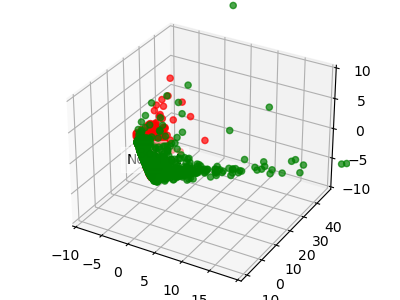

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")

ax.set_xlim3d(-10,20)
ax.set_zlim3d(-10,10)

fig.add_axes(ax)

plt.show()

In [248]:
%matplotlib notebook

import pandas as pd
import numpy as np

files_genuine = ["../cresci-2017.csv/genuine_accounts.csv/users.csv"]
files_bots = ["../cresci-2017.csv/traditional_spambots_1.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_2.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_3.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_4.csv/users.csv",
              "../cresci-2017.csv/social_spambots_1.csv/users.csv",
              "../cresci-2017.csv/social_spambots_2.csv/users.csv",
              "../cresci-2017.csv/social_spambots_3.csv/users.csv"]

train_raw_data_genuine = pd.concat((pd.read_csv(f) for f in files_genuine))
train_raw_data_genuine['label'] = 0

train_raw_data_bots = pd.concat((pd.read_csv(f) for f in files_bots))
train_raw_data_bots['label'] = 1

train_raw_data = pd.concat((train_raw_data_genuine, train_raw_data_bots))
train_raw_data = train_raw_data.rename(columns={})

train_profile = train_raw_data

train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

train_profile.set_index('id', inplace=True)

#Douteux
#train_profile = train_profile.replace([0], 1)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms", utc=True)

train_profile.created_at = train_profile.created_at.apply(date_converter)

train_labels = train_raw_data["label"].values
train_dict = {"statuses_count":train_profile.statuses_count, 
                "followers_count":train_profile.followers_count, 
                "friends_count":train_profile.friends_count, 
                "favourites_count":train_profile.favourites_count, 
                "listed_count":train_profile.listed_count, 
                "default_profile":train_profile.default_profile,
                "profile_use_background_image":train_profile.profile_use_background_image,
                "verified":train_profile.verified,
                "user_age":(pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(train_profile.statuses_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(train_profile.followers_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(train_profile.friends_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(train_profile.favourites_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(train_profile.listed_count / (probe_date - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(train_profile.followers_count / train_profile.friends_count, posinf=0.0),
                "screen_name_length": train_profile.screen_name.str.len(),
                "num_digits_in_screen_name": train_profile.screen_name.str.count('\d'),
                "name_length": train_profile.name.str.len(),
                "num_digits_in_name": train_profile.name.str.count('\d'),
                "description_length": train_profile.description.str.len(),
                 "label":train_labels
               }
train_features2 = pd.DataFrame(data=train_dict)
train_features2 = train_features2.replace({'True ': True, 'False ': False})
train_features2 = train_features2.fillna(0)

train_features2.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,...,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,0.134066,0.862576,0.000998,1491.791323,2.079815,...,0.191297,0.493167,0.003816,2.294207,11.800490,0.367341,12.368249,0.027866,46.488064,0.684669
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,0.340738,0.344310,0.031584,849.105707,6.109706,...,0.776523,2.181316,0.071677,57.977597,2.238532,1.036392,4.144440,0.356551,52.232170,0.464669
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,749.000000,0.018558,...,0.016821,0.000000,0.000000,0.136364,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1341.000000,0.033515,...,0.060238,0.000000,0.000267,0.437781,12.000000,0.000000,13.000000,0.000000,26.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,0.000000,1.000000,0.000000,2299.000000,1.401461,...,0.147323,0.060614,0.001525,1.062753,14.000000,0.000000,15.000000,0.000000,96.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,1.000000,1.000000,1.000000,3340.000000,150.060987,...,50.366057,77.252461,5.787497,4794.333333,15.000000,11.000000,48.000000,25.000000,298.000000,1.000000


<IPython.core.display.Javascript object>


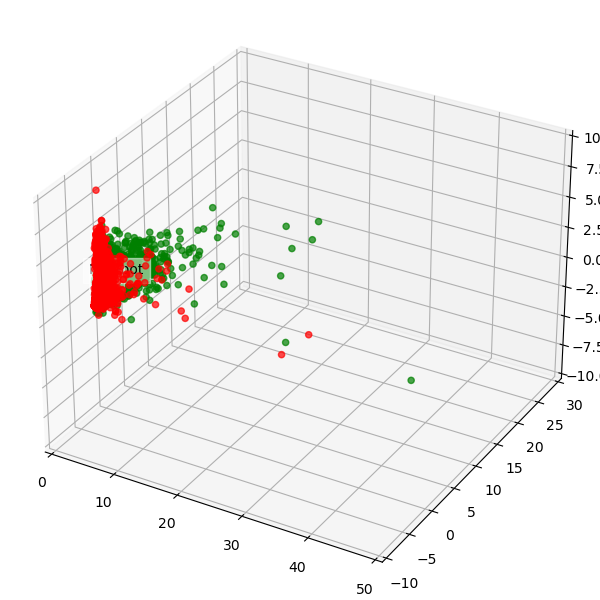

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")


fig.add_axes(ax)
ax.set_xlim3d(0,50)
ax.set_ylim3d(-10,30)
ax.set_zlim3d(-10,10)


plt.show()

In [253]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = train_features2['label']
X = train_features2.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=42)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 2385578917 to 60649090
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                3636 non-null   int64  
 1   followers_count               3636 non-null   int64  
 2   friends_count                 3636 non-null   int64  
 3   favourites_count              3636 non-null   int64  
 4   listed_count                  3636 non-null   int64  
 5   default_profile               3636 non-null   float64
 6   profile_use_background_image  3636 non-null   float64
 7   verified                      3636 non-null   float64
 8   user_age                      3636 non-null   int64  
 9   tweet_freq                    3636 non-null   float64
 10  followers_growth_rate         3636 non-null   float64
 11  friends_growth_rate           3636 non-null   float64
 12  favourites_growth_rate        3636 non-null   flo

In [254]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

In [255]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9867986798679867


favourites_count                0.351398
favourites_growth_rate          0.266734
tweet_freq                      0.093879
statuses_count                  0.081226
followers_count                 0.030290
friends_count                   0.028917
followers_growth_rate           0.027902
followers_friends_ratio         0.026193
user_age                        0.023687
friends_growth_rate             0.019401
description_length              0.012650
name_length                     0.010188
listed_growth_rate              0.008267
default_profile                 0.006278
listed_count                    0.005232
screen_name_length              0.004164
num_digits_in_screen_name       0.001894
profile_use_background_image    0.001453
num_digits_in_name              0.000149
verified                        0.000098
dtype: float64

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [257]:
train_profile[train_profile.favourites_count == 1]

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label
id,,,,,,,,,,,,,,,,,,,,,
131043638,Kenneth J. McCormick,AboutFactsNet,3114,28,32,1,0,http://t.co/93gshk5snR,en,Eastern Time (US & Canada),...,I am the webmaster of About Facts Internet mag...,NaN,NaN,2010-04-09 03:07:55+00:00,2010-04-09 05:07:55,2015-05-02 10:45:22,2016-03-15 15:54:01,0.0,0.0,0
2402142792,Khalifa(Eassa)elaslm,ISIOfficialacc,608,15,101,1,0,NaN,en,Karachi,...,NaN,NaN,NaN,2014-03-21 21:07:37+00:00,2014-03-21 22:07:37,2015-05-01 16:30:52,2016-03-15 15:56:56,0.0,0.0,0
1200888036,krishna choco,KrishnaChoco,641,11,69,1,0,NaN,en,NaN,...,NaN,NaN,NaN,2013-02-20 12:48:47+00:00,2013-02-20 13:48:47,2015-05-02 01:45:15,2016-03-15 15:58:02,1.0,0.0,0
2324541288,Sergei Mooha,SergeiMMusic7,397,187,288,1,7,http://t.co/i0Yxv8GiCT,en,Pacific Time (US & Canada),...,"Hi, my name is Sergei and I love promoting mus...",NaN,NaN,2014-02-03 00:28:43+00:00,2014-02-03 01:28:43,2015-05-01 16:05:10,2016-03-15 16:00:21,0.0,0.0,0
3089696867,TheRearAce,TheRearAce,50,28,32,1,0,https://t.co/anOZI1NbNY,en,Pacific Time (US & Canada),...,Hey there everyone i'm Ace and i do gaming vid...,NaN,NaN,2015-03-12 19:22:29+00:00,2015-03-12 20:22:29,2015-05-02 01:44:41,2016-03-15 16:01:03,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953307336,Celebrity Goo,CelebrityGoo,9938,549,1107,1,0,NaN,en,NaN,...,"All the buzz, gossip and general goo related t...",NaN,NaN,2012-11-17 10:25:01+00:00,2012-11-17 11:25:01,2014-05-05 23:15:03,2016-03-15 15:38:54,NaN,1.0,1
970094882,60s 70s 80s Top 100,60s70s70sTop100,8348,727,853,1,3,NaN,en,NaN,...,"Chronicling the top artists 100 of the 60s, 70...",NaN,NaN,2012-11-25 14:05:07+00:00,2012-11-25 15:05:07,2014-05-05 23:20:06,2016-03-15 15:39:20,NaN,1.0,1
981247207,ROFL Giggle Giggle,ROFLGiggle,10590,451,1941,1,3,NaN,en,NaN,...,Oh make me laugh :),NaN,NaN,2012-11-30 21:09:10+00:00,2012-11-30 22:09:10,2014-05-05 23:24:32,2016-03-15 15:40:04,NaN,1.0,1
